In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tutorial de Astropy

**Autor:** Luis Salazar Manzano  
**Última actualización:** Junio 2025  

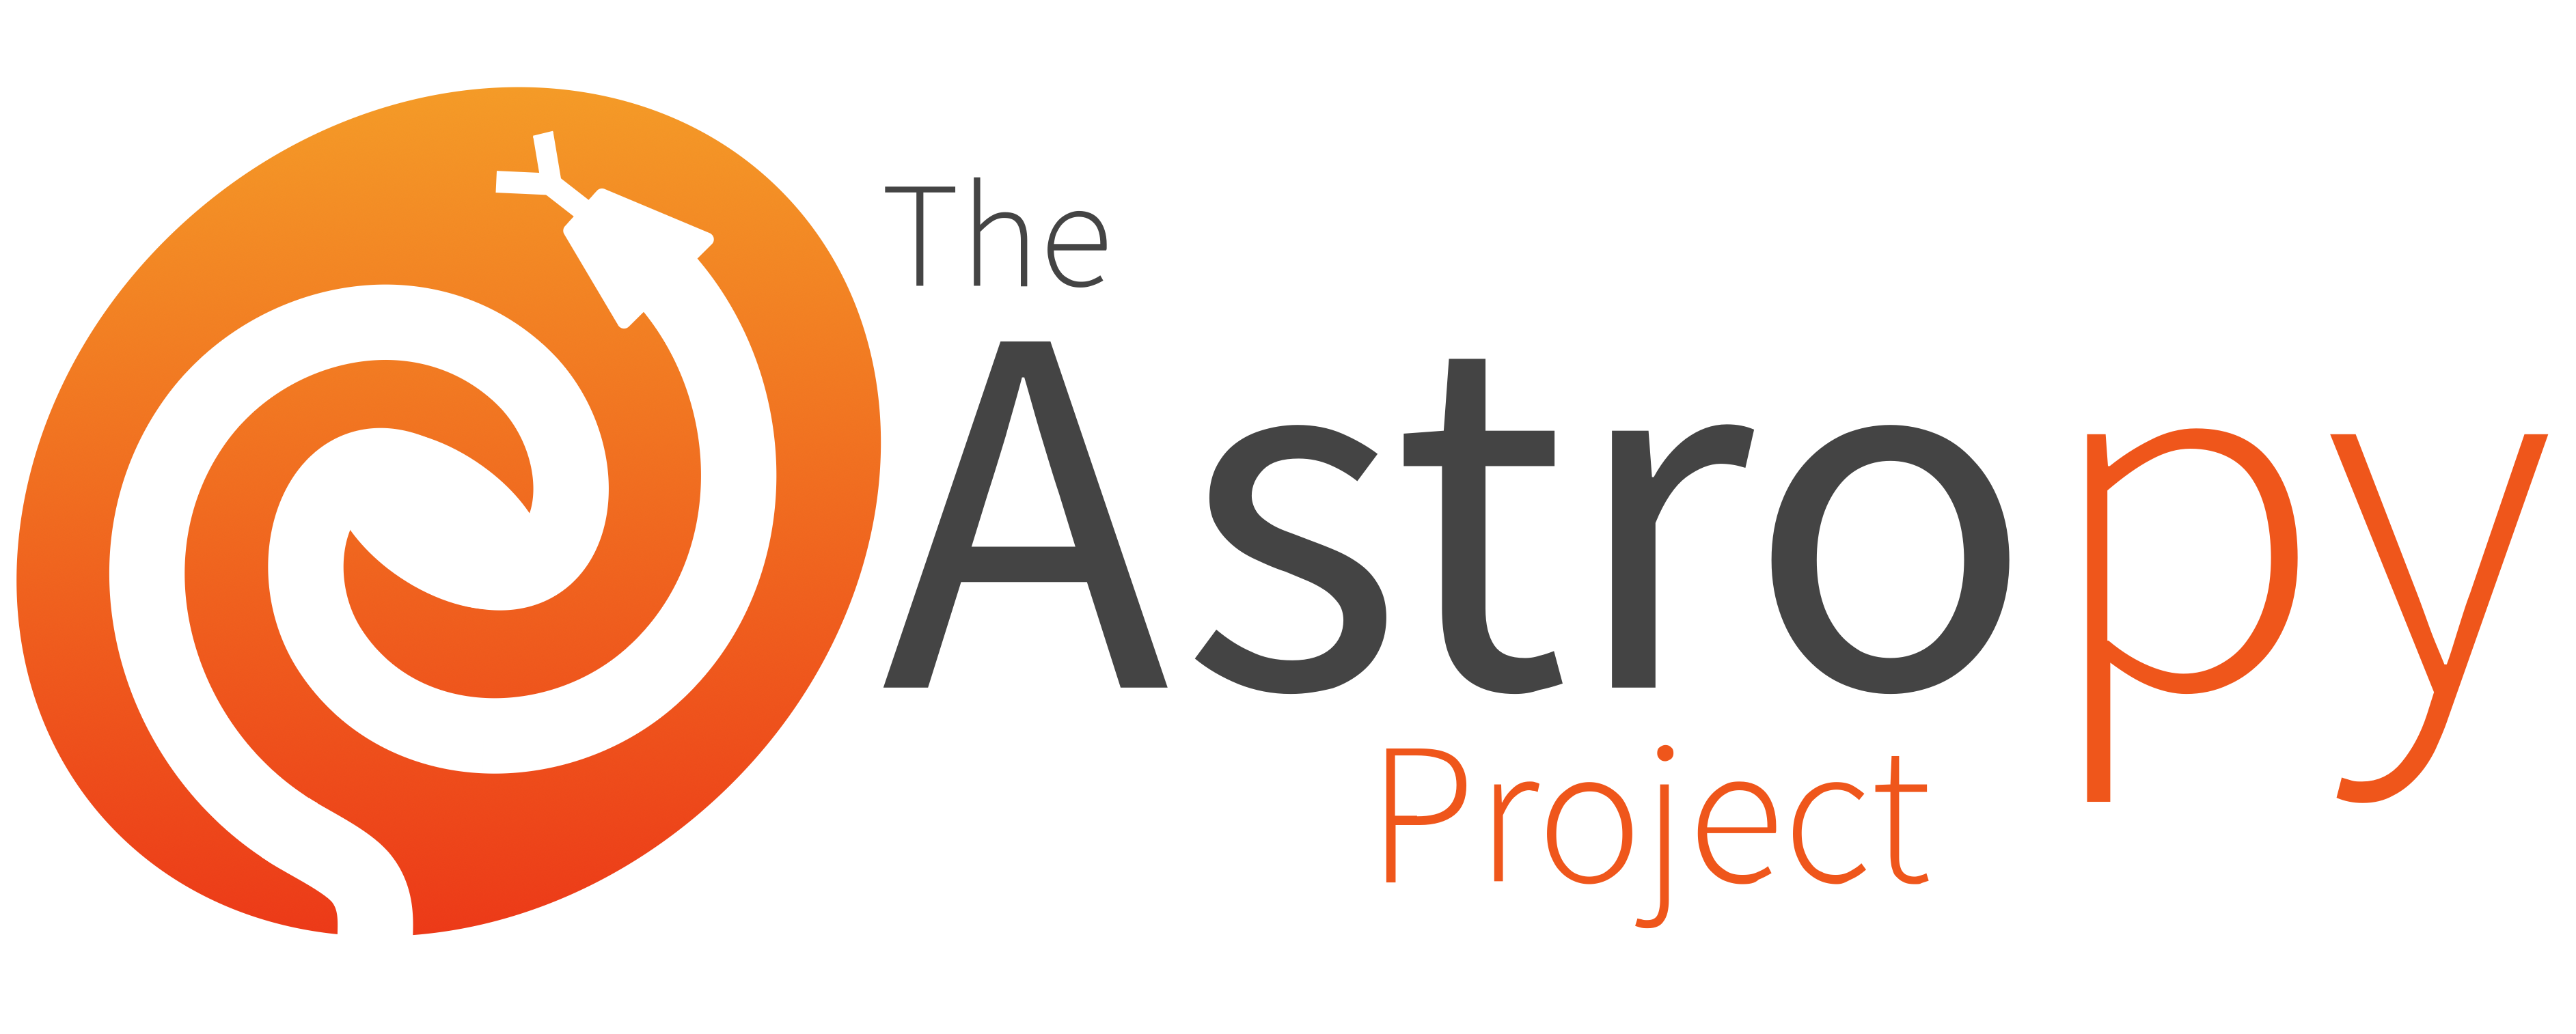

Astropy (https://www.astropy.org/) es un proyecto de código abierto y de desarrollo colaborativo que proporciona una extensa librería en Python para el análisis y procesamiento de datos astronómicos. Su misión es:

- Facilitar a la comunidad científica herramientas homogéneas y bien documentadas.  
- Promover buenas prácticas de programación en astronomía.  
- Fomentar la creación y el mantenimiento de paquetes afines (afiliados).

En este tutorial revisaremos de forma práctica algunos de los módulos centrales de Astropy:

1. **Units** – manejo y conversión de unidades físicas.  
2. **Constants** – constantes físicas con valores oficiales y sus incertidumbres.  
3. **Coordinates/Angle** – representación, formateo y manipulación de ángulos celestes.  
4. **Time** – formatos, escalas y operaciones de tiempo con precisión nanosegundo.  
5. **Coordinates/SkyCoord** – definición y transformación de sistemas de coordenadas celestes.  
6. **IO (FITS)** – lectura y escritura de archivos FITS, headers y tablas.  
7. **WCS** – transformación entre coordenadas de píxeles e “world coordinates” (RA/Dec, espectro, etc.).

Para instalar astropy solo se requiere correr el comando `pip install astropy`.

# Astropy units

`astropy.units` es un paquete muy útil para manipular cantidades físicas al momento de realizar cálculos y operaciones en astronomía. En esta sección del tutorial abordaremos los siguientes elementos:

- Cómo importar el paquete.  
- Las clases `Unit` y `Quantity`, sus atributos principales y la construcción de unidades compuestas.  
- Cómo convertir entre diferentes unidades y sistemas de medida.  
- Operaciones permitidas y no permitidas entre objetos `Quantity`.  
- Interacción de `Quantity` con `numpy` y sus funciones vectorizadas.  
- Dónde encontrar la lista completa de unidades disponibles.  

¡Empecemos!


In [ ]:
import astropy.units as u
# from astropy import units as u

Clases Unit y Quantity:

In [ ]:
u.AU

In [ ]:
type(u.AU)

In [ ]:
u.AU.physical_type

In [ ]:
distance = 1 * u.AU
distance

In [ ]:
type(distance)

In [ ]:
distance.value

In [ ]:
distance.unit

Conversión de unidades:

In [ ]:
distance.to(u.km)

In [ ]:
distance.to(u.pc)

In [ ]:
distance.to(u.lyr), distance.to(u.lsec)

In [ ]:
# factor de escale
(u.AU).to(u.km)

In [ ]:
velocity =  299792458 * u.m / u.s 

In [ ]:
velocity.to(u.km / u.h)

Operaciones permitidas y no permitidas:

In [ ]:
distance**2

In [ ]:
distance2 = 5 * u.AU

In [ ]:
distance + distance2

In [ ]:
distance + 1.4959787e11 * u.m

In [ ]:
distance + velocity

In [ ]:
(distance / velocity).si

In [ ]:
distance.to(u.km/u.s)

Conversión de sistemas de medidas:

In [ ]:
# luminosity_array = np.array([1, 10, 100]) * u.Lsun
# luminosity_array
luminosity = 1 * u.Lsun
luminosity

In [ ]:
luminosity.to(u.W)

In [ ]:
luminosity.decompose()

In [ ]:
luminosity.si

In [ ]:
luminosity.cgs

In [ ]:
luminosity.to(u.erg/u.s)

In [ ]:
gravitational = 6.67430e-11 * u.m**3 / (u.kg * u.s**2)
gravitational

In [ ]:
gravitational.si

In [ ]:
gravitational.cgs

In [ ]:
g_earth = gravitational * u.Mearth / u.Rearth**2
g_earth

In [ ]:
g_earth.si

In [ ]:
F_earth = g_earth * 80 * u.kg
F_earth

In [ ]:
F_earth.to(u.N)

In [ ]:
g_jupiter = gravitational * u.Mjupiter / u.Rjupiter**2
g_jupiter.si

In [ ]:
F_jupiter = g_jupiter * 80 * u.kg
F_jupiter.to(u.N)

In [ ]:
F_ratio = (F_jupiter / F_earth).si
F_ratio

In [ ]:
type(F_ratio)

In [ ]:
F_ratio.value

In [ ]:
F_ratio.unit

Numpy y astropy Quantity

In [ ]:
luminosity_array = np.array([1, 10, 100]) * u.Lsun
luminosity_array

In [ ]:
type(luminosity_array)

In [ ]:
luminosity_array.value

In [ ]:
luminosity_array.unit

In [ ]:
np.sin(90 * u.deg)

In [ ]:
np.sin((90 * u.deg).to(u.rad))

In [ ]:
np.log10(F_earth)

In [ ]:
np.log10(F_ratio)

Existen muchas unidades más: https://docs.astropy.org/en/stable/units/ref_api.html#module-astropy.units.si

In [ ]:
u.Msun, u.Lsun, u.Rsun

In [ ]:
u.M_sun, u.L_sun, u.R_sun

In [ ]:
u.Msun.aliases

In [ ]:
u.Mjup, u.Rjup, u.Mearth, u.Rearth

In [ ]:
u.Angstrom, u.nm, u.micron, 

In [ ]:
u.Hz, u.MHz

In [ ]:
u.deg, u.arcmin, u.arcsec, u.mas, u.sr, u.rad

In [ ]:
u.g, u.kg

In [ ]:
u.yr, u.d, u.h, u.s

In [ ]:
u.N, u.Pa

Las equivalencias (no cubierto aquí) también son una funcionalidad importante de astropy.units

# Astropy constants

`astropy.constants` complementa a `astropy.units`, facilitando el uso de constantes físicas con valores oficiales e incertidumbres asociadas. En esta sección del tutorial veremos:

- Cómo importar el paquete.  
- Parentescos y diferencias con `astropy.units`.  
- Ejemplos prácticos de constantes comunes (velocidad de la luz, constante gravitatoria, constante de Planck, …).  

Uso básico:

In [ ]:
import astropy.constants as const

In [ ]:
# from astropy.constants import G

In [ ]:
G = const.G
G

In [ ]:
G.value

In [ ]:
G.unit

In [ ]:
G.uncertainty

In [ ]:
G.cgs

In [ ]:
gravitational - G

In [ ]:
c = const.c
c

In [ ]:
velocity - c

Algunas constantes de ejemplo: https://astro-docs.readthedocs.io/en/latest/constants/index.html

In [ ]:
const.L_sun

In [ ]:
const.e

In [ ]:
const.m_e

In [ ]:
const.k_B

# Astropy angle

`astropy.coordinates.Angle` es una herramienta esencial para la cotidianidad de los astrónomos, ya que permite trabajar con ángulos en sus diferentes representaciones (grados, radianes, HMS/DMS, …) de forma consistente. En esta sección del tutorial veremos:

- Cómo importar el módulo.  
- Formas de inicializar un objeto `Angle` (valores numéricos, cadenas sexagesimales, arrays).  
- Sus principales atributos (`value`, `unit`, acceso a grados, radianes, DMS/HMS).  
- Métodos y operaciones más comunes (conversión de unidades, formateo a string, wrappings, funciones trigonométricas).  

¡Empecemos!

Importar:

In [ ]:
from astropy.coordinates import Angle

Inicialización:

In [ ]:
angle_test = Angle(90, u.deg)
angle_test

In [ ]:
type(angle_test)

In [ ]:
angle_test2 = Angle(90 * u.deg)
angle_test2

In [ ]:
angle_test3 = Angle('12h30m15.5s')
angle_test3

Atributos:

In [ ]:
angle_test.value

In [ ]:
angle_test.unit

In [ ]:
angle_test.rad

In [ ]:
angle_test.deg

In [ ]:
angle_test.dms

In [ ]:
angle_test.hms

In [ ]:
angle_test.arcsec

In [ ]:
angles_test = Angle(np.arange(0, 360, 10), u.deg)
angles_test.deg

Operaciones

In [ ]:
np.sin(angle_test)

In [ ]:
angle_test + 60 * u.arcsec

Metodos:

In [ ]:
angle_test.to_string(unit=u.deg)

In [ ]:
angle_test.to_string(unit=u.deg, sep=":")

In [ ]:
angle_test.to_string(unit=u.deg, sep=":", precision=2)

In [ ]:
angle_test.to_string(unit=u.hourangle)

In [ ]:
angle_test.to_string(unit=u.rad)

In [ ]:
angle_test.to_string(unit=u.arcsec)

In [ ]:
large_angle = Angle(400 * u.deg)
large_angle

In [ ]:
large_angle.wrap_at(360 * u.deg)

# Astropy Time

`astropy.time.Time` es un submódulo muy usada para representar y manipular instantes y duraciones con alta precisión, múltiples escalas y formatos. En esta sección del tutorial revisaremos:

- Cómo importar `Time`.  
- Formas de inicializar objetos `Time` (ISO, JD, MJD, arrays).  
- Escalas de tiempo (UTC, TDB, …) y sus parámetros principales.  
- Atributos útiles (`iso`, `jd`, `mjd`, `ymdhms`).  
- Operaciones típicas: diferencias, sumas, conversiones de escala y formato.  

Importar:

In [ ]:
from astropy.time import Time

Inicialización y atributos:

In [ ]:
time_test = Time("2025-06-01 12:00:00", format='iso', scale='utc')
time_test

In [ ]:
type(time_test)

In [ ]:
# format
time_test.jd, time_test.mjd, time_test.iso, time_test.isot

In [ ]:
# scale
time_test.tdb, time_test.tt, time_test.utc

In [ ]:
time_test.tdb.jd, time_test.tdb.mjd, time_test.tdb.iso

In [ ]:
time_test2 = Time(2460828.000800751, format="jd", scale="tdb")
time_test2

Operaciones

In [ ]:
time_test + 1 * u.d

In [ ]:
time_test + np.arange(0, 10) * u.d

In [ ]:
Time.now()

In [ ]:
time_test - (time_test + 1 * u.d)

# Astropy SkyCoord

Quiza, uno de los submodulos de Astropy más utilizados en astronomía es SkyCoord dado que todos los objetos de estudio en astronomía tiene una coordenada sobre la esfera celeste. En esta sección abordaremos lo siguiente:

- Como importar el paquete.
- Como inicializar un objeto SkyCoord y sus principales atributos.
- Los diferentes representaciones, de referencia y transformaciones.
- Algunos metodos comunes.
- Cómo transformar coordenadas a un sistema local.

`astropy.coordinates.SkyCoord` es quizás uno de los submódulos más utilizados de todo astropy, ya que cualquier objeto celeste se describe mediante coordenadas en la esfera celeste. En esta sección abordaremos:

- Cómo importar el módulo `SkyCoord`.  
- Cómo inicializar un objeto `SkyCoord` y cuáles son sus atributos principales.  
- Las diferentes representaciones y sistemas de referencia, y cómo transformarlos.  
- Algunos métodos comunes (por ejemplo, `separation()`,  `match_to_catalog_sky()`).  
- Cómo transformar coordenadas a un sistema local (AltAz), combinando `SkyCoord`, `Time` y `EarthLocation`.  

Importar:

In [ ]:
from astropy.coordinates import SkyCoord

Inicialización y atributos:

In [ ]:
coord1 = SkyCoord(ra=270*u.deg, dec=25*u.deg, frame="icrs")

In [ ]:
type(coord1)

In [ ]:
coord1.ra

In [ ]:
coord1.dec

In [ ]:
coord1.frame

In [ ]:
coord1 = SkyCoord(270, 25, unit=(u.deg, u.deg), frame="icrs" )
coord1

In [ ]:
coord1 = SkyCoord("12h30m25s -15d30m10s", frame="icrs")
coord1

In [ ]:
coord_array = SkyCoord(np.linspace(0, 360, 20), np.linspace(-90, 90, 20), unit=(u.deg, u.deg), frame="icrs")
coord_array

Sistemas de coordenadas:

In [ ]:
coord1.cartesian.xyz.value

In [ ]:
coord1.cylindrical

In [ ]:
coord1.spherical

Marcos de referencia:

In [ ]:
coord1.galactic

In [ ]:
coord1.galactic.l

In [ ]:
coord1.galactic.b

In [ ]:
from astropy.coordinates import Galactic
coord1.transform_to(Galactic())

In [ ]:
coord3 = SkyCoord(np.linspace(0, 360, 100)*u.deg, np.zeros(100)*u.deg, frame="galactic")
coord3

In [ ]:
plt.plot(coord3.icrs.ra.deg, coord3.icrs.dec.deg, '.')

In [ ]:
coord1.fk4

Algunos metodos:

In [ ]:
coord1.to_string('hmsdms')

In [ ]:
coord1.to_string('dms')

In [ ]:
coord1.separation(coord_array).deg

In [ ]:
# match_to_catalog_sky()

Coordenadas locales:

In [ ]:
from astropy.coordinates import AltAz, EarthLocation

In [ ]:
decam = EarthLocation.of_site("Kitt Peak")
decam

In [ ]:
decam.geocentric

In [ ]:
decam.geodetic

In [ ]:
EarthLocation.get_site_names()

In [ ]:
observatory = AltAz(location=decam, obstime=time_test)
observatory

In [ ]:
coord1_altaz = coord1.transform_to(observatory)

In [ ]:
coord1_altaz

In [ ]:
coord1_altaz.alt

In [ ]:
coord1_altaz.az

In [ ]:
coord1_altaz

# Astropy Fits

Los archivos **FITS** (Flexible Image Transport System) son el estándar en astronomía para el almacenamiento de datos científicos. Un fichero FITS consta de:

- **Encabezado (header):** contiene metadatos (fecha, instrumento, condiciones de observación, WCS, unidades, etc.).  
- **Datos:** matriz con valores que representan imágenes, cubos, espectros o tablas.

Aunque FITS soporta distintos tipos de extensiones (imágenes, espectros, tablas…), en esta sección nos centraremos en imágenes y veremos:

- Cómo importar `astropy.io.fits`.  
- Cómo abrir un archivo FITS y explorar su encabezado y datos.  
- Cómo editar el header y procesar la matriz de la imagen.  
- Cómo visualizar una imagen FITS con `matplotlib`.  


In [ ]:
from astropy.io import fits

In [ ]:
# image_file = fits.util.get_testdata_filepath('test1.fits')			
# image_file

In [ ]:
# from astropy.utils.data import download_file
# from astropy.utils.data import download_file
# image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)
image_file = 'image_example.fits'

In [ ]:
# HDUL (Header/Data Unit List)
hdul = fits.open(image_file)
# hdul = fits.open('example2.fits')

In [ ]:
hdul.info()

In [ ]:
hdul[0].header

In [ ]:
list(hdul[0].header.keys())

In [ ]:
hdul[0].header['TELESCOP']

In [ ]:
hdul[0].header['DATE-OBS']

In [ ]:
hdul[1].header

In [ ]:
hdul[0].data

In [ ]:
np.shape(hdul[0].data)

In [ ]:
plt.hist(hdul[0].data.flatten(), bins='scott')

In [ ]:
plt.imshow(hdul[0].data, origin='lower', cmap='gray')
# plt.imshow(hdul[0].data, origin='lower', cmap='gray', vmin=300, vmax=325)

In [ ]:
plt.imshow(hdul[0].data, origin='lower', cmap='gray', vmin=5000, vmax=17000)

In [ ]:
# Notes: 
# - Headers are like python dictionaries.
# - Use the with statement to open files, so they are closed automatically.

# Astropy WCS

El World Coordinate System (WCS) define las convenciones para transformar coordenadas de píxeles en un archivo FITS a coordenadas espaciales (RA/Dec), espectrales o temporales. En esta última parte del tutorial abordaremos:

- Cómo importar `astropy.wcs`.  
- Cómo construir un objeto `WCS` a partir del header de un archivo FITS.  
- Cómo convertir entre coordenadas de píxeles y coordenadas “world” (pixel ↔ world).  
- Cómo superponer la grilla de coordenadas en una imagen con `matplotlib`.  


In [ ]:
from astropy.wcs import WCS

In [ ]:
wcs = WCS(hdul[0].header)

In [ ]:
wcs

In [ ]:
pixel_coord = wcs.pixel_to_world(10, 5)
pixel_coord

In [ ]:
wcs.world_to_pixel(pixel_coord)

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': wcs})
ax.imshow(hdul[0].data, origin='lower', cmap='gray', vmin=5000, vmax=17000)
ax.grid(color='white', ls='dotted')

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': wcs})
ax.imshow(hdul[0].data, origin='lower', cmap='gray', vmin=5000, vmax=17000)
ax.grid(color='white', ls='dotted')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='yellow', ls='dashed')
overlay[0].set_axislabel('Galactic Longitude')
overlay[1].set_axislabel('Galactic Latitude')

# Notas finales

Lo mostrado hasta aquí no cubre de forma exhaustiva todas las funcionalidades de los paquetes mencionados, ni incluye muchos otros submódulos de Astropy muy valiosos para la comunidad astronómica, como:

- **Table**: estructuras de datos tabulares y operaciones avanzadas.  
- **Modeling**: definición, combinación y ajuste de modelos físicos o empíricos.  
- **Timeseries**: lectura, manipulación y análisis de datos en forma de series temporales.  
- **LombScargle**: generación de periodogramas para detección de señales periódicas en datos irregulares.  
- **Astroquery**: consultas programáticas a servicios y catálogos astronómicos en línea.  


Finalmente, algunas referencias para ampliar la información aquí presentada:

- Documentación oficial de astropy: https://docs.astropy.org/en/stable/index_user_docs.html
- Tutorial de astropy por el profesor Germán Chaparro: https://github.com/saint-germain/astropy/tree/master
- Mini workshop de astropy: https://github.com/heliophysicsPy/summer-school/tree/main/astropy-tutorial